# Demographic filtering
It is one of the simplest movie recommendation system that offers users the best rated and most popular movies. However it seems simple, we need appropriate formula to measure the rating of a movie to consider it as best among others. Only rating won't give us the proper results cause if a movie has 9.5 rating but number of votes is less than 10, then it biases our result.

So Here we use the popular formula given by IMDB, which is articulated [here](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop) clearly. It basically gives the weightage based on number of votes and ratings of that movie. The formula as follows:

$$W = \frac{R*v+C*m}{v+m}$$

Where,  

- $W \to$ Weight of the rating  
- $R \to$ Average rating of the movie
- $v \to$ Number of votes for the movie
- $C \to$ Mean of the average votes of whole data
- $m \to$ Minimum number of votes to be considered

Therefore we need to determine mean of average votes of whole data ($C$) and decide minimum number of votes to be considered ($m$). First lets import the preprocessed data from Preprocess folder and other required modules.

In [1]:
import pandas as pd
import numpy as np
from preprocessing import df
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

Now lets calculate $C$ which is mean of all the votes in the data using vote average column:

In [2]:
C = df["vote_average"].mean()
C

6.094186288810164

For $m$ which is minimum number of votes to be considered. Lets take 80% as our cuttoff, i.e. the movie needs to have more votes than 80% of the movies. We can use the quantile function:

In [3]:
m = df["vote_count"].quantile(0.8)
m

958.4000000000001

This implies a movie must have atleast $\approx$ 958 votes to be considered for based on rating score. So for demographic filtering lets filter out all other votes which have vote count lesser than $m$.

In [4]:
print("Before: ",df.shape)
df = df.copy().loc[df["vote_count"] >= m]
print("After: ", df.shape)

Before:  (4799, 21)
After:  (960, 21)


Now lets create our weightage function which gives rating based on imdb rating formula.

In [5]:
def weight_ratings(row):
    v = row["vote_count"]
    R = row["vote_average"]
    return (R*v+C*m)/(v+m)

Lets create a new column called weightage, for our preferred rating criteria.

In [6]:
df['weightage'] = df.apply(weight_ratings, axis=1)

That's it the work is done, all thats left is sorting the dataframe based on weightage and printing top films.

In [7]:
df.sort_values("weightage", ascending=False, inplace=True)

In [20]:
df[["title","weightage", "vote_average", "vote_count"]].head(15)

,title,weightage,vote_average,vote_count
1881,The Shawshank Redemption,8.248376,8.5,8205
662,Fight Club,8.096165,8.3,9413
3337,The Godfather,8.077454,8.4,5893
3232,Pulp Fiction,8.074775,8.3,8428
65,The Dark Knight,8.044279,8.2,12002
809,Forrest Gump,7.972862,8.2,7927
96,Inception,7.969319,8.1,13752
95,Interstellar,7.937437,8.1,10867
1990,The Empire Strikes Back,7.904828,8.2,5879
1818,Schindler's List,7.900172,8.3,4329


Lets visualise the same data using matplotlib library.

Text(0.5, 1.0, 'Most Rated Movies Based on IMDB')

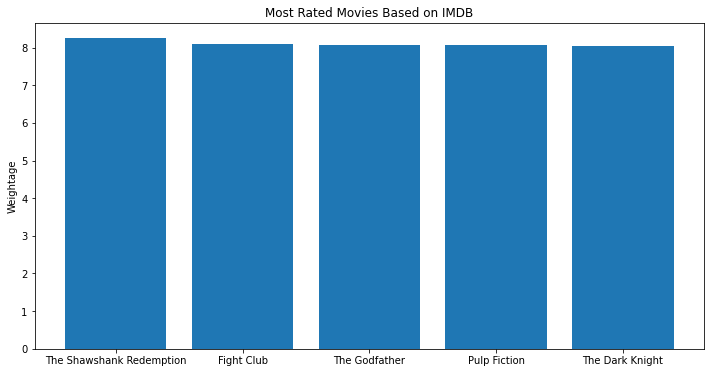

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(df['title'].head(5),df['weightage'].head(5))
plt.ylabel("Weightage")
plt.title("Most Rated Movies Based on IMDB")

We already have a column called popularity in the data frame, lets describe the most popular according to that column.

In [22]:
popular = df.sort_values("popularity", ascending=False)
df[["title","weightage", "vote_average", "vote_count"]].head(15)

,title,weightage,vote_average,vote_count
1881,The Shawshank Redemption,8.248376,8.5,8205
662,Fight Club,8.096165,8.3,9413
3337,The Godfather,8.077454,8.4,5893
3232,Pulp Fiction,8.074775,8.3,8428
65,The Dark Knight,8.044279,8.2,12002
809,Forrest Gump,7.972862,8.2,7927
96,Inception,7.969319,8.1,13752
95,Interstellar,7.937437,8.1,10867
1990,The Empire Strikes Back,7.904828,8.2,5879
1818,Schindler's List,7.900172,8.3,4329


Text(0.5, 1.0, 'Most Popular Movies')

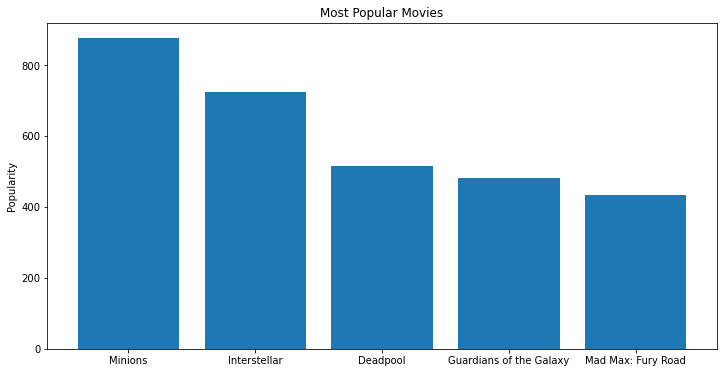

In [32]:
plt.figure(figsize=(12,6))
plt.bar(popular['title'].head(5),popular['popularity'].head(5))
plt.ylabel("Popularity")
plt.title("Most Popular Movies")

Here we can observe that based on how we measure the popularity, we will get different weights on different movies.